In [122]:
import pandas as pd
from PIL import Image
import requests
import matplotlib.pyplot as plt
from pathlib import Path
from fastai.conv_learner import *
import torchvision.transforms as transforms
from fastai.io import get_data

%matplotlib inline

In [126]:
captions_and_links_valid = pd.read_csv("Validation_GCC-1.1.0-Validation.tsv", sep="\t",header=None)

In [127]:
captions_and_links_valid.head()

,0,1
0,author : a life in photography -- in pictures,https://i.pinimg.com/736x/66/01/6c/66016c3ba27...
1,an angler fishes river on a snowy day .,http://www.standard.net/image/2015/02/04/800x_...
2,photograph of the sign being repaired by brave...,http://indianapolis-photos.funcityfinder.com/f...
3,the player staring intently at a computer scre...,http://www.abc.net.au/news/image/9066492-3x2-7...
4,globes : the green 3d person carrying in hands...,https://www.featurepics.com/StockImage/2009031...


In [136]:
def show_image_w_caption(df, idx):
    try:
        caption, link = df.iloc(0)[idx]
        img = Image.open(requests.get(link, stream = True).raw)
        plt.title(caption)
        plt.imshow(img)
    except:
        pass

In [137]:
def get_image_w_caption(df, PATH, idx):
    try:
        caption, link = df.iloc(0)[idx]
        img = Image.open(requests.get(link, stream = True).raw)
        img.save(VAL_PATH/(str(idx)+".png"),format='png')
    except:
        return None
    return str(VAL_PATH/(str(idx)+".png")), caption

## Download the validation dataset

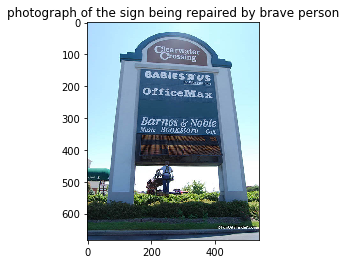

In [139]:
show_image_w_caption(captions_and_links_valid, 2)

In [140]:
length = len(captions_and_links)

In [141]:
length

15840

In [142]:
images = {}
for i in range(150):
    result = get_image_w_caption(captions_and_links_valid, VAL_PATH, i)
    if result is not None:
        images[i] = result

In [123]:
pickle.dump(images, (PATH/'valid_dict.pkl').open('wb'))

In [124]:
images = pickle.load((PATH/'valid_dict.pkl').open('rb'))

In [125]:
images

{0: ('data/val/0.png', 'author : a life in photography -- in pictures'),
 2: ('data/val/2.png',
  'photograph of the sign being repaired by brave person'),
 3: ('data/val/3.png', 'the player staring intently at a computer screen .'),
 4: ('data/val/4.png', 'globes : the green 3d person carrying in hands globe'),
 5: ('data/val/5.png', 'the - bedroom stone cottage can sleep people'),
 6: ('data/val/6.png', 'film of a garbage truck'),
 7: ('data/val/7.png', 'young woman seated on the beach'),
 8: ('data/val/8.png', 'party in the park under cherry blossoms')}

automobile model was abandoned over the weekend


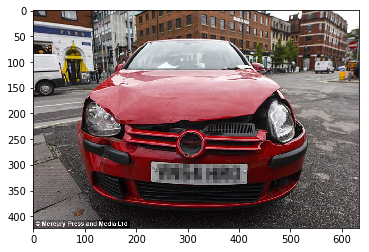

In [155]:
fn, cap = images[119]
img = Image.open(fn)
plt.imshow(img)
print(cap)